In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./서울최종.csv", encoding='cp949')
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,station_id,station_name,subway,complex,market,before,after
0,119000104,7호선장승배기역.상도2치안센터,1,0,2,7544,8000
1,119000104,7호선장승배기역.상도2치안센터,1,0,2,7633,6686
2,119000104,7호선장승배기역.상도2치안센터,1,0,2,8851,8644
3,119000104,7호선장승배기역.상도2치안센터,1,0,2,8365,8804
4,119000104,7호선장승배기역.상도2치안센터,1,0,2,8184,9153


In [3]:
data.describe()

,station_id,subway,complex,market,before,after
count,2.160000e+03,2160.000000,2160.0,2160.000000,2160.000000,2160.000000
mean,1.166779e+08,0.622222,0.0,0.800000,16990.263889,17298.117593
std,6.004811e+06,0.724012,0.0,0.897116,18128.775777,17406.115586
min,1.050001e+08,0.000000,0.0,0.000000,662.000000,808.000000
25%,1.110001e+08,0.000000,0.0,0.000000,6953.750000,7381.500000
50%,1.190001e+08,0.000000,0.0,1.000000,11156.500000,11615.500000
75%,1.200002e+08,1.000000,0.0,1.000000,20302.500000,21394.500000
max,1.230003e+08,2.000000,0.0,4.000000,133607.000000,134496.000000


### 상관관계 행렬

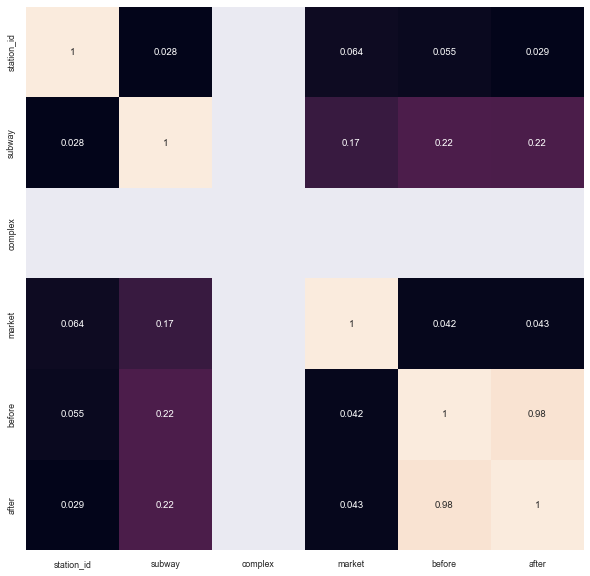

In [4]:
#상관관계행렬
df_corr = data.corr()

#히트맵그리기
plt.figure(figsize = (10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

### 선형회귀선 표시

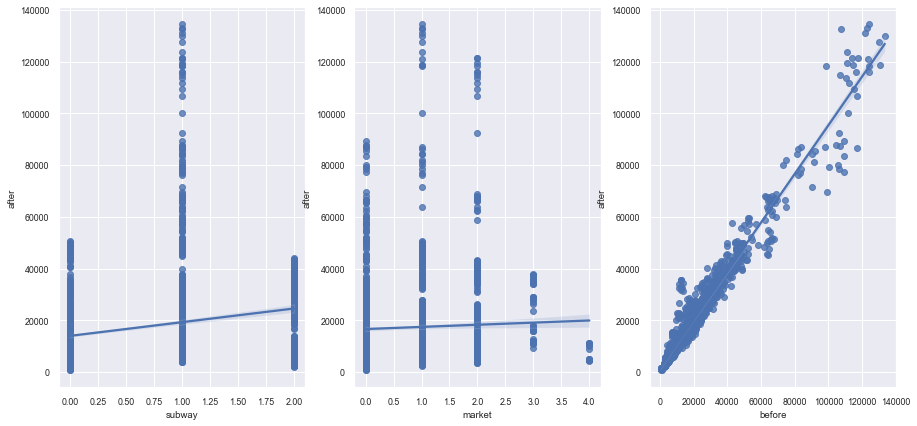

In [18]:
d_cols = ['subway', 'market', 'before']

plt.figure(figsize=(15,7))
for idx, col in enumerate(d_cols) :
    ax1 = plt.subplot(1,3, idx+1)
    sns.regplot(x=col, y='after', data=data, ax=ax1)
plt.show()

### 타겟데이터 분포 확인

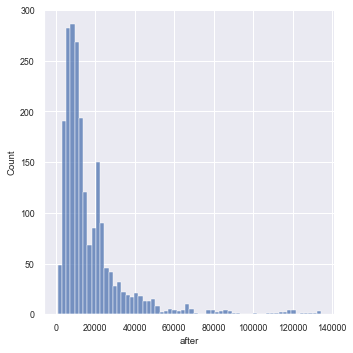

In [19]:
sns.displot(x='after', kind='hist', data=data)

In [23]:
data[data['after'] > 100000]

,station_id,station_name,subway,complex,market,before,after
228,119000024,노량진역,1,0,1,110894,123789
229,119000024,노량진역,1,0,1,111480,100175
230,119000024,노량진역,1,0,1,133607,129862
231,119000024,노량진역,1,0,1,124469,134496
232,119000024,노량진역,1,0,1,123004,132849
233,119000024,노량진역,1,0,1,124095,118443
234,119000024,노량진역,1,0,1,121696,130871
235,119000024,노량진역,1,0,1,123653,121065
236,119000024,노량진역,1,0,1,130823,118788
237,119000024,노량진역,1,0,1,107762,132644


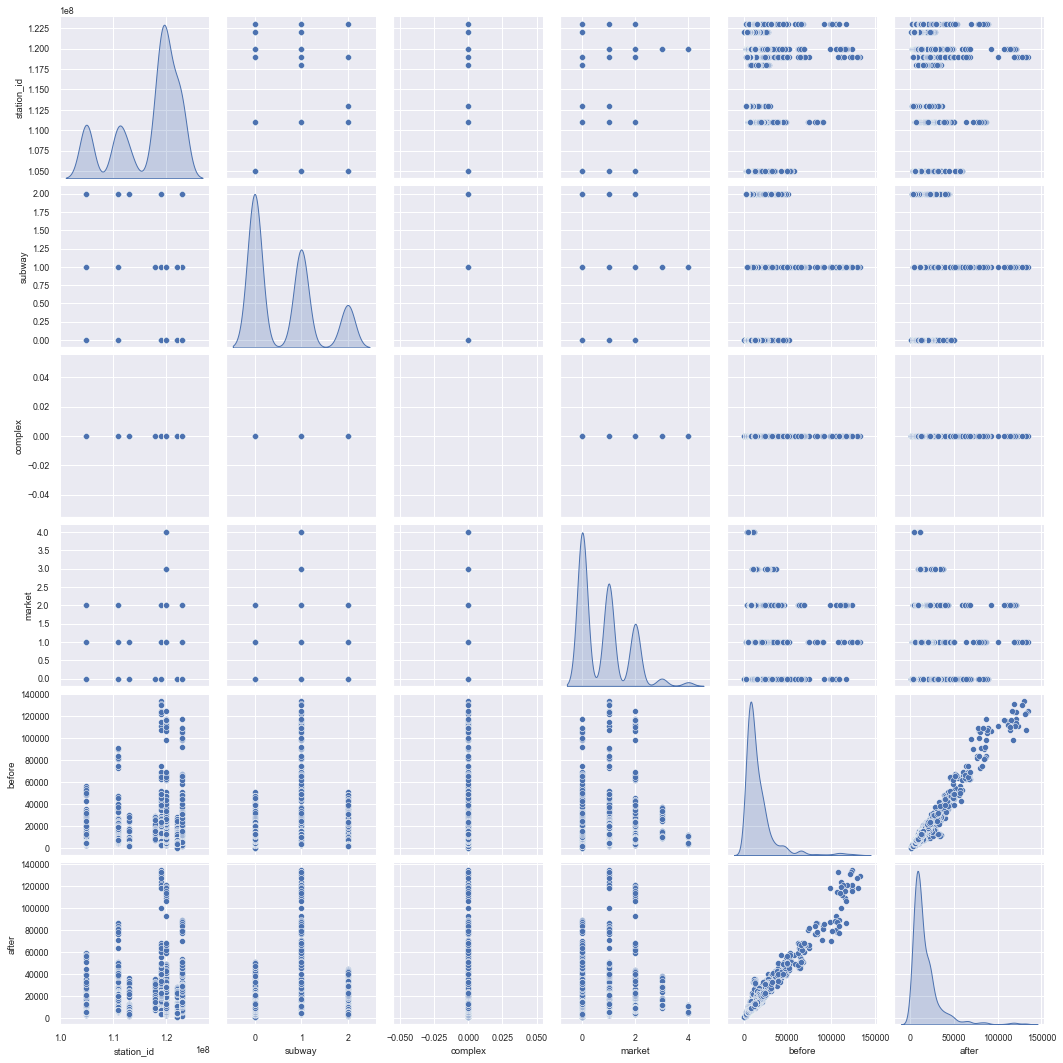

In [34]:
sns.pairplot(data, diag_kind='kde')

In [116]:
def plot_importance(model, features) :
    importances = model.feature_importances_
    indices = np.argsort(importances)
    feature_names = [features[i] for i in indices]
    feature_imp = importances[indices]

    plt.figure(figsize = (8, 6))
    plt.title('Feature importances')
    plt.barh(range(len(indices)), feature_imp, align='center')
    plt.yticks(range(len(indices)), feature_names)
    plt.xlabel('relative importance')

    print('feature : ', list(reversed(feature_names)))
    print('importance : ', list(reversed(feature_imp)))

    return list(reversed(feature_names)), list(reversed(feature_imp))

feature :  [3, 2, 0, 1]
importance :  [0.9850328734820516, 0.011036496668459057, 0.003930629849489345, 0.0]


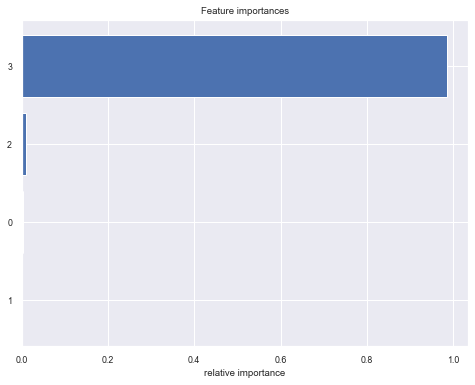

In [126]:
#x_train
#xx = pd.DataFrame(x_train)
#type(xx)
#xx
imp_features, imp_scores = plot_importance(rfr, xx.columns)

<AxesSubplot:xlabel='after', ylabel='Count'>

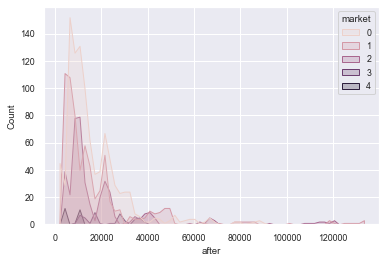

In [12]:
sns.histplot(data=data, x='after', hue='market', fill=True, element='poly')

<AxesSubplot:xlabel='after', ylabel='Count'>

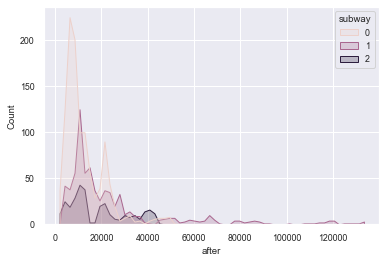

In [13]:
sns.histplot(data=data, x='after', hue='subway', fill=True, element='poly')

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

from sklearn import tree
from sklearn import metrics

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [27]:
x_data = data[['subway', 'complex', 'market', 'before']]
y_data = data['after']

# train, test data split
x_train, x_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.2, shuffle=True, random_state=10)

print('x_train shape:', x_train.shape, '\nx_test shape:', x_test.shape)

x_train shape: (1728, 4) 
x_test shape: (432, 4)


In [28]:
# data scale 조정
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [231]:
comp_dict = {}
comp_dict2 = []
comp_dict3 = []

### 의사결정나무

In [232]:
dtr = tree.DecisionTreeRegressor(random_state=10)
dtr.fit(x_train, y_train)

y_pred = dtr.predict(x_test)

# train data 정확도 R2(R-squared) 측정
print('Train data\'s R2-score :', format(dtr.score(x_train, y_train)))
# test data 정확도 R2(R-squared) 측정
print('Test data\'s R2-score :', format(dtr.score(x_test,y_test)))
# test data 평균제곱오차(MSE) 측정
print('MSE :', mean_squared_error(y_pred, y_test, squared=False))
# test data 평균절대값오차(MAE) 측정
print('MAE :', mean_absolute_error(y_test, y_pred))

Train data's R2-score : 0.9999382883084122
Test data's R2-score : 0.949206080327652
MSE : 3826.816073048775
MAE : 2218.365740740741


In [233]:
#데이터프레임에 넣기
test_r2 = dtr.score(x_test,y_test)
rmse = np.sqrt(mean_squared_error(y_pred, y_test, squared=False))
mae = mean_absolute_error(y_test, y_pred)

comp_dict['DecisionTree'] = test_r2
comp_dict2.append(rmse)
comp_dict3.append(mae)

### 랜덤포레스트

In [234]:
# 랜덤 포레스트 모델링
rfr = RandomForestRegressor(n_estimators=50, random_state = 7)
rfr.fit(x_train,y_train)

y_pred = rfr.predict(x_test)

# train data 정확도 R2(R-squared) 측정
print('Train data\'s R2-score :', format(rfr.score(x_train, y_train)))
# test data 정확도 R2(R-squared) 측정
print('Test data\'s R2-score :', format(rfr.score(x_test,y_test)))
# test data 평균제곱오차(MSE) 측정
print('MSE :', mean_squared_error(y_pred, y_test, squared=False))
# test data 평균절대값오차(MAE) 측정
print('MAE :', mean_absolute_error(y_test, y_pred))

Train data's R2-score : 0.9938081513845303
Test data's R2-score : 0.9681289745113021
MSE : 3031.3057568646036
MAE : 1830.4149081790124


In [235]:
#데이터프레임에 넣기
test_r2 = rfr.score(x_test,y_test)
rmse = np.sqrt(mean_squared_error(y_pred, y_test, squared=False))
mae = mean_absolute_error(y_test, y_pred)

comp_dict['RandomForest'] = test_r2
comp_dict2.append(rmse)
comp_dict3.append(mae)

### 다중선형회귀

In [236]:
# 다중선형회귀 모델링
lr = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

# train data 정확도 R2(R-squared) 측정
print('Train data\'s Accuracy : ', format(lr.score(x_train, y_train)))
# test data 정확도 R2(R-squared) 측정
print('Test data\'s Accuracy : ', format(lr.score(x_test,y_test)))
# test data 평균제곱오차(MSE) 측정
print('MSE :', mean_squared_error(y_test, y_pred, squared=False))
# test data 평균절대값오차(MAE) 측정
print('MAE :', mean_absolute_error(y_test, y_pred))

Train data's Accuracy :  0.958239567855028
Test data's Accuracy :  0.9509098477476948
MSE : 3762.087696535182
MAE : 2024.9561813066784


In [237]:
#데이터프레임에 넣기
test_r2 = lr.score(x_test,y_test)
rmse = np.sqrt(mean_squared_error(y_pred, y_test, squared=False))
mae = mean_absolute_error(y_test, y_pred)

comp_dict['LinearRegression'] = test_r2
comp_dict2.append(rmse)
comp_dict3.append(mae)

### Gradient Boost

In [247]:
num_estimators = [100,500,1000]
learn_rates = [0.1, 0.5, 1]
max_depths = [1, 2, 3, 4]
min_samples_leaf = [5,10,15]
min_samples_split = [2,5,10]

param_grid = {'n_estimators': num_estimators,
            'learning_rate': learn_rates,
             'max_depth': max_depths,
             'min_samples_leaf': min_samples_leaf,
             'min_samples_split': min_samples_split}

grid_search = GridSearchCV(GradientBoostingRegressor(loss='huber'),
                          param_grid, cv=3, return_train_score=True)
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 100}

In [238]:
# GB 모델링
gb = GradientBoostingRegressor(min_samples_leaf= 10, min_samples_split=2, learning_rate=0.1, max_depth=4, n_estimators=100)
gb.fit(x_train,y_train)

y_pred = gb.predict(x_test)

# train data 정확도 R2(R-squared) 측정
print('Train data\'s Accuracy : ', format(gb.score(x_train,y_train)))
# test data 정확도 R2(R-squared) 측정
print('Test data\'s Accuracy : ', format(gb.score(x_test,y_test)))
# test data 평균제곱오차(MSE) 측정
print('MSE :', mean_squared_error(y_test, y_pred, squared=False))
# test data 평균절대값오차(MAE) 측정
print('MAE :', mean_absolute_error(y_test, y_pred))

Train data's Accuracy :  0.9743803678400638
Test data's Accuracy :  0.9708167174576674
MSE : 2900.673153057979
MAE : 1733.974498703786


In [239]:
#데이터프레임에 넣기
test_r2 = gb.score(x_test,y_test)
rmse = np.sqrt(mean_squared_error(y_pred, y_test, squared=False))
mae = mean_absolute_error(y_test, y_pred)

comp_dict['GradientBoost'] = test_r2
comp_dict2.append(rmse)
comp_dict3.append(mae)

### light gradient boost regressor

In [240]:
# LGB 모델링
lgb = LGBMRegressor(max_depth=4, n_estimators=100, random_state=5)
lgb.fit(x_train,y_train)

y_pred = lgb.predict(x_test)

# train data 정확도 R2(R-squared) 측정
print('Train data\'s Accuracy : ', format(lgb.score(x_train,y_train)))
# test data 정확도 R2(R-squared) 측정
print('Test data\'s Accuracy : ', format(lgb.score(x_test,y_test)))
# test data 평균제곱오차(MSE) 측정
print('MSE :', mean_squared_error(y_test, y_pred, squared=False))
# test data 평균절대값오차(MAE) 측정
print('MAE :', mean_absolute_error(y_test, y_pred))

Train data's Accuracy :  0.968880989027785
Test data's Accuracy :  0.9626146179777466
MSE : 3283.088855446102
MAE : 1859.3253384857699


In [241]:
#데이터프레임에 넣기
test_r2 = lgb.score(x_test,y_test)
rmse = np.sqrt(mean_squared_error(y_pred, y_test, squared=False))
mae = mean_absolute_error(y_test, y_pred)

comp_dict['LightGBM'] = test_r2
comp_dict2.append(rmse)
comp_dict3.append(mae)

### cat boost regressor

In [242]:
# CBR 모델링
cbr = CatBoostRegressor(verbose=0, random_state=31)
cbr.fit(x_train,y_train)

y_pred = cbr.predict(x_test)

print(y_pred)

# train data 정확도 R2(R-squared) 측정
print('Train data\'s Accuracy : ', format(cbr.score(x_train,y_train)))
# test data 정확도 R2(R-squared) 측정
print('Test data\'s Accuracy : ', format(cbr.score(x_test,y_test)))
# test data 평균제곱오차(MSE) 측정
print('MSE :', mean_squared_error(y_test, y_pred, squared=False))
# test data 평균절대값오차(MAE) 측정
print('MAE :', mean_absolute_error(y_test, y_pred))

[ 18278.55763584  15462.50684862   3271.64847816  21318.233221
   6292.52880448   3020.05211027  21123.5148037   58163.1625935
   9693.88934423  11939.18869871  12658.25144546  21313.28265127
  19240.74765474  11581.30172377   1334.58796701   7651.88312673
  20807.16688012   3991.77773943   3991.77773943  18044.97261522
  35334.30472334   9141.54165003  18288.86119871   7292.276424
  28947.50502457   4787.81113812  10661.85685614   6633.916439
   9159.32664666   9032.79935032   6940.13158078  13336.72826443
   6168.12861016   6062.72558085   4989.60513409  11773.82054638
   3823.43144708   9260.71701517  10531.86170731   7398.2121904
   8161.94014553  10103.18234934  30579.61695968  20759.60838064
   3975.56376081  21281.16961486  89065.76457599   7036.88632007
   6548.97427783  12082.35620556  17810.30170202  13303.10699264
   9880.3105787    6548.97427783   6148.88238655  30706.07094511
   4045.55839645   7558.20918128   1334.58796701   4658.3196011
   5405.46037671   7292.276424    

In [243]:
#데이터프레임에 넣기
test_r2 = cbr.score(x_test,y_test)
rmse = np.sqrt(mean_squared_error(y_pred, y_test, squared=False))
mae = mean_absolute_error(y_test, y_pred)

comp_dict['CatBoost'] = test_r2
comp_dict2.append(rmse)
comp_dict3.append(mae)

### 엘라스틱넷(L2/L1 규제)

In [112]:
# ElasticNet(L2/L1 규제) p.121
from sklearn.linear_model import ElasticNet

pf=PolynomialFeatures(degree=2)
x_train_poly=pf.fit_transform(x_train)
x_test_poly=pf.fit_transform(x_test)

ela=ElasticNet(alpha=0.01, l1_ratio=0.7)
ela.fit(x_train_poly, y_train)

y_train_pred=ela.predict(x_train_poly)
train_mse=mean_squared_error(y_train, y_train_pred)
train_rmse=np.sqrt(train_mse)
print('Train MSE: %.4f' % train_mse)
print('Train RMSE: %.4f' % train_rmse)
y_test_pred=ela.predict(x_test_poly)
test_mse=mean_squared_error(y_test, y_test_pred)
test_rmse=np.sqrt(test_mse)
print('Test MSE: %.4f' %test_mse)
print('Test RMSE: %.4f' % test_rmse)

r2 = metrics.r2_score(y_test_pred, y_test)
RMSE=round(np.sqrt(mean_squared_error(y_pred, y_test, squared=False)), 2)

comp_dict['ElasticNet Regression'] = r2
print(f'ElasticNet Regression r2-score: {r2:0.5f}')
print(f'ElasticNet Regression RMSE: {RMSE:0.2f}')

Train MSE: 11744727.8751
Train RMSE: 3427.0582
Test MSE: 11273771.1177
Test RMSE: 3357.6437
ElasticNet Regression r2-score: 0.96367
ElasticNet Regression RMSE: 51.60


### method 비교

In [244]:
final_df = pd.DataFrame(comp_dict.items(), columns=['Estimator', 'R2-score'])
final_df['RMSE'] = comp_dict2
final_df['MAE'] = comp_dict3

In [245]:
final_df

,Estimator,R2-score,RMSE,MAE
0,DecisionTree,0.949206,61.861265,2218.365741
1,RandomForest,0.968129,55.057295,1830.414908
2,LinearRegression,0.950910,61.335860,2024.956181
3,GradientBoost,0.970817,53.857898,1733.974499
4,LightGBM,0.962615,57.298245,1859.325338
5,CatBoost,0.975406,51.602920,1645.757200


In [246]:
final_df.sort_values(by='R2-score', ascending=False).style.background_gradient()

,Estimator,R2-score,RMSE,MAE
5,CatBoost,0.975406,51.602920,1645.757200
3,GradientBoost,0.970817,53.857898,1733.974499
1,RandomForest,0.968129,55.057295,1830.414908
4,LightGBM,0.962615,57.298245,1859.325338
2,LinearRegression,0.950910,61.335860,2024.956181
0,DecisionTree,0.949206,61.861265,2218.365741


### 젤 성능좋은 catboost에 test data를 넣어보자

In [169]:
data2 = pd.read_csv("./대구최종.csv", encoding='cp949')
data2.drop(['Unnamed: 0', 'after'], axis=1, inplace=True)
data2.head()

,station_id,station_name,subway,complex,market,before
0,7001000100,대명시장앞,0.0,0,3,26874
1,7001000100,대명시장앞,0.0,0,3,4985
2,7001000200,대명시장건너,0.0,0,3,17379
3,7001000200,대명시장건너,0.0,0,3,3360
4,7001000300,계명대학교대명캠퍼스앞,0.0,0,4,11964


In [226]:
#'상인현대맨션앞''대곡주공8단지앞'
k = data2[data2['station_name'].isin(['상인현대맨션앞', '대곡주공8단지앞'])]
kk = k.drop(['station_id', 'station_name'], axis=1)

#데이터프레임을 배열 형태로 바꾸기
kkk = []
for i in range(kk.shape[0]) :
    a = kk.iloc[i].tolist()
    kkk.append(a)

#스케일 조정
kkk = scaler.transform(kkk)

print(kkk)


[[-0.87108874  0.          1.29470443  1.06029571]
 [-0.87108874  0.          1.29470443 -0.66115456]
 [ 0.51495301  0.          1.29470443 -0.0068799 ]
 [ 0.51495301  0.          1.29470443  1.4581143 ]
 [-0.87108874  0.          1.29470443 -0.27930883]
 [-0.87108874  0.          1.29470443 -0.8919539 ]
 [ 0.51495301  0.          1.29470443  0.16871014]
 [ 0.51495301  0.          1.29470443 -0.0123897 ]]


In [227]:
# CBR 모델링
cbr = CatBoostRegressor(verbose=0, random_state=31)
cbr.fit(x_train,y_train)

predict = cbr.predict(kkk)

predict = pd.DataFrame(predict)
predict

,0
0,33584.636383
1,5539.329817
2,17028.702759
3,44872.615739
4,11270.501832
5,2858.248399
6,19562.276918
7,16989.939073


In [228]:
k.index=[0,1,2,3,4,5,6,7]
daegu_pred = pd.concat([k, predict], axis=1, ignore_index=True)
daegu_pred.columns = ['station_id', 'station_name', 'subway', 'complex', 'market', 'before', 'after']
daegu_pred = daegu_pred.astype({'after' : int})
daegu_pred

,station_id,station_name,subway,complex,market,before,after
0,7041020700,대곡주공8단지앞,0.0,0,2,36143,33584
1,7041020700,대곡주공8단지앞,0.0,0,2,5212,5539
2,7041053500,상인현대맨션앞,1.0,0,2,16968,17028
3,7041053500,상인현대맨션앞,1.0,0,2,43291,44872
4,7041020700,대곡주공8단지앞,0.0,0,2,12073,11270
5,7041020700,대곡주공8단지앞,0.0,0,2,1065,2858
6,7041053500,상인현대맨션앞,1.0,0,2,20123,19562
7,7041053500,상인현대맨션앞,1.0,0,2,16869,16989


In [230]:
pred_final = daegu_pred
pred_final['change'] = round(pred_final.after / pred_final.before *100, 2)
pred_final

,station_id,station_name,subway,complex,market,before,after,change
0,7041020700,대곡주공8단지앞,0.0,0,2,36143,33584,92.92
1,7041020700,대곡주공8단지앞,0.0,0,2,5212,5539,106.27
2,7041053500,상인현대맨션앞,1.0,0,2,16968,17028,100.35
3,7041053500,상인현대맨션앞,1.0,0,2,43291,44872,103.65
4,7041020700,대곡주공8단지앞,0.0,0,2,12073,11270,93.35
5,7041020700,대곡주공8단지앞,0.0,0,2,1065,2858,268.36
6,7041053500,상인현대맨션앞,1.0,0,2,20123,19562,97.21
7,7041053500,상인현대맨션앞,1.0,0,2,16869,16989,100.71
